In [1]:
import pandas as pd


file_list = [
    
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_1_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_2_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_3_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_4_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_5_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_6_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_7_7.csv'
]

# 从CSV文件读取数据，并将日期列转换为datetime类型
df_list = [pd.read_csv(f, parse_dates=["IncorporationDate"]) for f in file_list]

# 合并所有数据框为一个大的数据框
df = pd.concat(df_list, ignore_index=True)
df.dropna(subset=['lat', 'long'], inplace=True)


# top_density_postcodes

In [37]:
import pandas as pd
import numpy as np

def top_density_postcodes(df, num_postcodes):
    # 根据邮编分组，计算每个邮编的公司数量
    postcode_counts = df.groupby('RegAddress.PostCode').size().reset_index(name='CompanyCount')

    # 获取每个邮编的经纬度坐标
    postcode_coordinates = df.groupby('RegAddress.PostCode').first().reset_index()

    # 合并计算得到的数据
    merged_data = pd.merge(postcode_counts, postcode_coordinates[['RegAddress.PostCode', 'lat', 'long']], on='RegAddress.PostCode')

    # 按公司数量降序排序，获取前num_postcodes个邮编
    top_postcodes = merged_data.nlargest(num_postcodes, 'CompanyCount')

    # 输出结果，包括邮编、经纬度坐标和公司数量
    output_data = top_postcodes[['RegAddress.PostCode', 'lat', 'long', 'CompanyCount']]
    
    return output_data


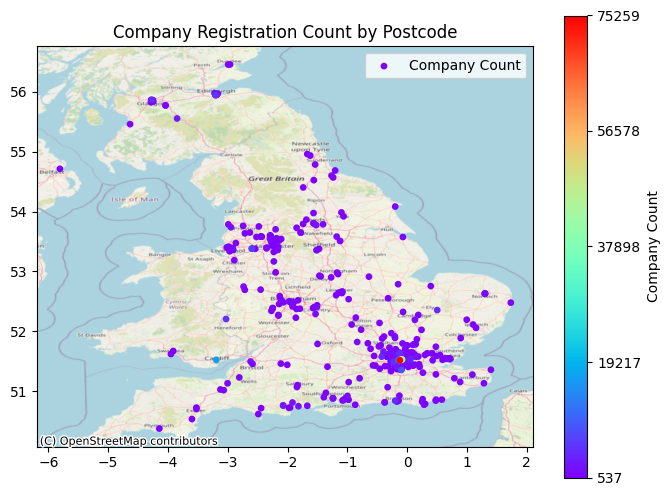

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

top_100_postcodes = top_density_postcodes(df, num_postcodes=500)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
top_100_postcodes = top_100_postcodes.sort_values(by='CompanyCount', ascending=True)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Company Registration Count by Postcode')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(top_100_postcodes['long'], top_100_postcodes['lat'], s=8, c=top_100_postcodes['CompanyCount'], cmap='rainbow', alpha=1, linewidths=2,label='Company Count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Company Count')

# 计算最小值和最大值
min_count = top_100_postcodes['CompanyCount'].min()
max_count = top_100_postcodes['CompanyCount'].max()

# 设置colorbar的刻度
num_ticks = 5 
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
# 添加图例
ax.legend()

# 显示地图
plt.show()


       RegAddress.PostCode        lat      long  CompanyCount
191020             CV1 2NT  52.405088 -1.510919          1937
107604             BS9 3BY  51.493520 -2.618916          2007
177753             CR0 1JB  51.368278 -0.096773          2010
527963              N3 2JU  51.599404 -0.193789          2045
885573            WA14 4RW  53.397872 -2.353017          2053
258687              E1 0SG  51.514375 -0.050404          2080
69739              BH7 7DU  50.745861 -1.819193          2094
688187             RM6 6AX  51.573037  0.146854          2143
893308            WC1X 0ND  51.528157 -0.117329          2173
364798            HP19 8FJ  51.820102 -0.836682          2208
285488             EH6 7BD  55.973982 -3.166106          2229
595284             NW7 3SA  51.615625 -0.258170          2234
877513             W1W 6XH  51.520587 -0.141079          2245
285902             EH7 5JA  55.959244 -3.179179          2358
264018             E16 2DQ  51.502804  0.045583          2442
66678   

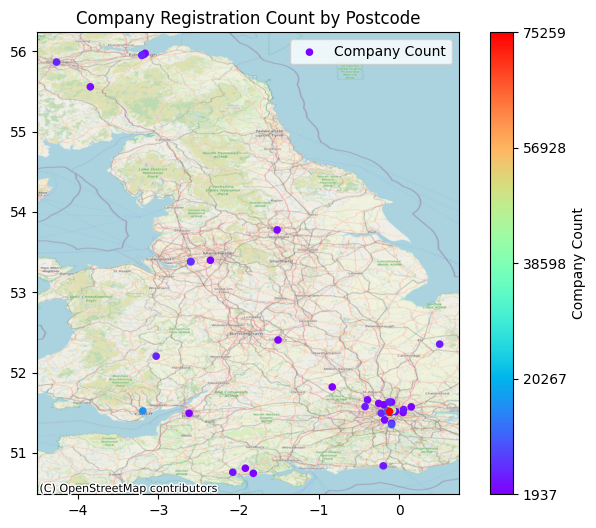

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np


top_50_postcodes = top_density_postcodes(df, num_postcodes=50)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
top_50_postcodes = top_50_postcodes.sort_values(by='CompanyCount', ascending=True)

print(top_50_postcodes)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Company Registration Count by Postcode')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(top_50_postcodes['long'], top_50_postcodes['lat'], s=12, c=top_50_postcodes['CompanyCount'], cmap='rainbow', alpha=1, linewidths=2,label='Company Count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Company Count')

# 计算最小值和最大值
min_count = top_50_postcodes['CompanyCount'].min()
max_count = top_50_postcodes['CompanyCount'].max()

# 设置colorbar的刻度
num_ticks = 5  
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
# 添加图例
ax.legend()

# 显示地图
plt.show()



       RegAddress.PostCode        lat      long  CompanyCount
883114             WA1 1RG  53.380293 -2.595923          6544
179964             CR2 6EQ  51.352071 -0.098320          8783
893533            WC2A 2JR  51.514455 -0.111772          9243
877588             W1W 7LT  51.518467 -0.142405         12952
141056            CF14 8LH  51.522153 -3.194287         16504
893044            WC1N 3AX  51.520592 -0.122210         18163
272922            EC2A 4NE  51.525615 -0.083628         19480
519899              N1 7GU  51.530785 -0.093391         46437
272273            EC1V 2NX  51.527304 -0.088894         47469
893981            WC2H 9JQ  51.514897 -0.123615         75259


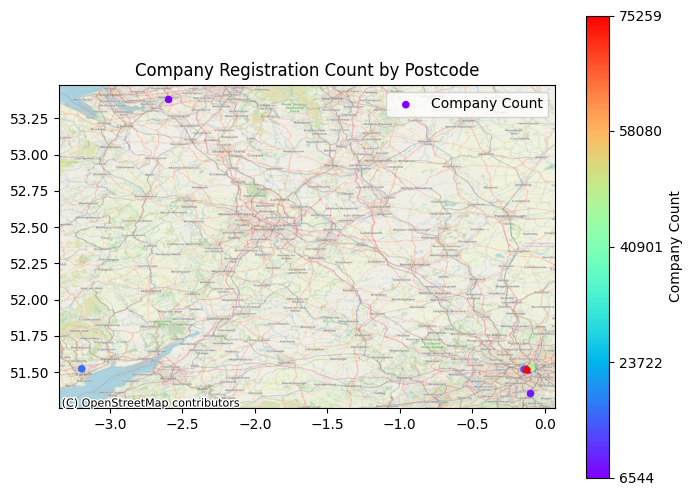

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np


top_10_postcodes = top_density_postcodes(df, num_postcodes=10)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
top_10_postcodes = top_10_postcodes.sort_values(by='CompanyCount', ascending=True)

print(top_10_postcodes)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Company Registration Count by Postcode')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(top_10_postcodes['long'], top_10_postcodes['lat'], s=12, c=top_10_postcodes['CompanyCount'], cmap='rainbow', alpha=1, linewidths=2,label='Company Count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Company Count')

# 计算最小值和最大值
min_count = top_10_postcodes['CompanyCount'].min()
max_count = top_10_postcodes['CompanyCount'].max()

# 设置colorbar的刻度
num_ticks = 5 
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
# 添加图例
ax.legend()

# 显示地图
plt.show()



# filter_threshold_postcodes

In [50]:
import pandas as pd
import numpy as np

def filter_threshold_postcodes(df, threshold):
    # 根据邮编分组，计算每个邮编的公司数量
    postcode_counts = df.groupby('RegAddress.PostCode').size().reset_index(name='CompanyCount')

    # 获取每个邮编的经纬度坐标
    postcode_coordinates = df.groupby('RegAddress.PostCode').first().reset_index()

    # 合并计算得到的数据
    merged_data = pd.merge(postcode_counts, postcode_coordinates[['RegAddress.PostCode', 'lat', 'long']], on='RegAddress.PostCode')

    # 筛选出公司数量超过阈值的邮编
    filtered_postcodes = merged_data[merged_data['CompanyCount'] > threshold]

    # 输出结果，包括邮编、经纬度坐标和公司数量
    output_data = filtered_postcodes[['RegAddress.PostCode', 'lat', 'long', 'CompanyCount']]
    
    return output_data


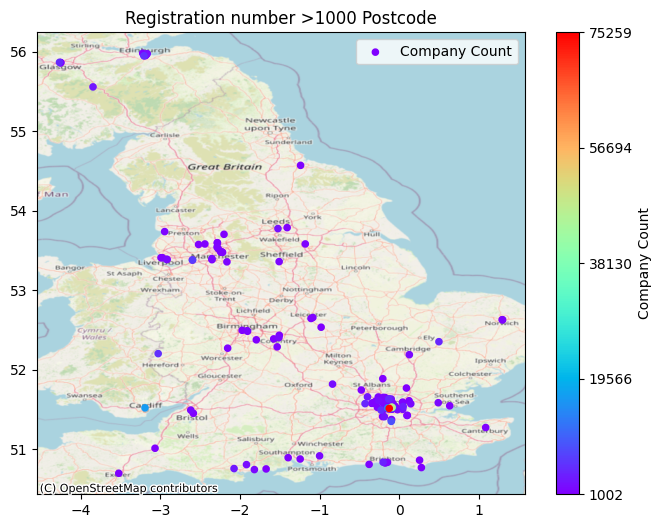

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

filter_1000_postcodes = filter_threshold_postcodes(df, threshold=1000)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
filter_1000_postcodes = filter_1000_postcodes.sort_values(by='CompanyCount', ascending=True)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Registration number >1000 Postcode')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(filter_1000_postcodes['long'], filter_1000_postcodes['lat'], s=12, c=filter_1000_postcodes['CompanyCount'], cmap='rainbow', alpha=1, linewidths=2,label='Company Count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Company Count')

# 计算最小值和最大值
min_count = filter_1000_postcodes['CompanyCount'].min()
max_count = filter_1000_postcodes['CompanyCount'].max()

# 设置colorbar的刻度
num_ticks = 5  
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
# 添加图例
ax.legend()

# 显示地图
plt.show()

       RegAddress.PostCode        lat      long  CompanyCount
309486              G2 4JR  55.865464 -4.268940          5011
371755             HR5 3DJ  52.203481 -3.028489          5373
881267              W6 0NB  51.493393 -0.226335          5429
280212             EH3 9WJ  55.947591 -3.206944          5554
877400             W1W 5PF  51.521673 -0.143705          6403
883114             WA1 1RG  53.380293 -2.595923          6544
179964             CR2 6EQ  51.352071 -0.098320          8783
893533            WC2A 2JR  51.514455 -0.111772          9243
877588             W1W 7LT  51.518467 -0.142405         12952
141056            CF14 8LH  51.522153 -3.194287         16504
893044            WC1N 3AX  51.520592 -0.122210         18163
272922            EC2A 4NE  51.525615 -0.083628         19480
519899              N1 7GU  51.530785 -0.093391         46437
272273            EC1V 2NX  51.527304 -0.088894         47469
893981            WC2H 9JQ  51.514897 -0.123615         75259


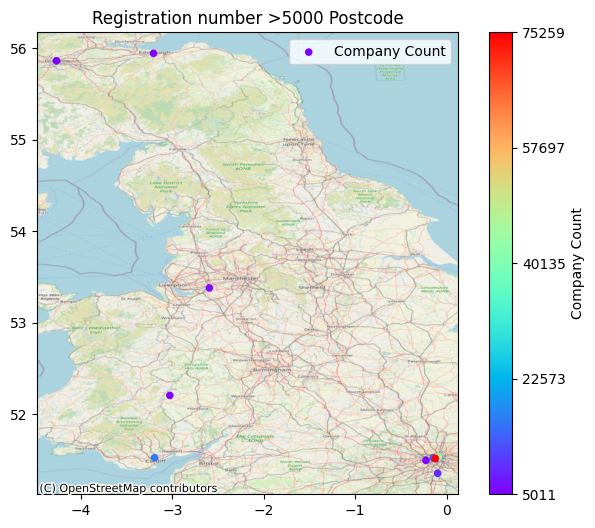

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

filter_5000_postcodes = filter_threshold_postcodes(df, threshold=5000)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
filter_5000_postcodes = filter_5000_postcodes.sort_values(by='CompanyCount', ascending=True)

print(filter_5000_postcodes)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Registration number >5000 Postcode')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(filter_5000_postcodes['long'], filter_5000_postcodes['lat'], s=12, c=filter_5000_postcodes['CompanyCount'], cmap='rainbow', alpha=1, linewidths=2,label='Company Count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Company Count')

# 计算最小值和最大值
min_count = filter_5000_postcodes['CompanyCount'].min()
max_count = filter_5000_postcodes['CompanyCount'].max()

# 设置colorbar的刻度
num_ticks = 5  
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
#ax.set_ylim([50, 56.5])
# 添加图例
ax.legend()

# 显示地图
plt.show()

# dense_registrations_within_period

In [87]:
def filter_by_dense_registration(df, threshold=200, duration=pd.Timedelta('15 days')):
    # 对邮编和日期进行排序
    df_sorted = df.sort_values(by=['RegAddress.PostCode', 'IncorporationDate'])
    
    # 使用 groupby 计算每个邮编在每个日期的公司数量
    grouped = df_sorted.groupby(['RegAddress.PostCode', 'IncorporationDate']).size().reset_index(name='daily_count')
    
    # 对每个邮编的日期使用 rolling 函数，计算在指定时间段内的公司数量
    grouped['Rolling_count'] = grouped.groupby('RegAddress.PostCode')['daily_count'].rolling(window=duration.days, min_periods=1).sum().reset_index(0, drop=True)
    
    # 筛选超过阈值的邮编
    dense_areas = grouped[grouped['Rolling_count'] > threshold]
    
    # 对每个邮编取 rolling_count 的最大值
    dense_areas_max = dense_areas.groupby('RegAddress.PostCode').agg({'Rolling_count': 'max'}).reset_index()
    
    # 获取邮编的经纬度
    lat_long = df_sorted.drop_duplicates(subset='RegAddress.PostCode')[['RegAddress.PostCode', 'lat', 'long']]
    
    # 合并数据
    output_data = pd.merge(dense_areas_max, lat_long, on='RegAddress.PostCode')[['RegAddress.PostCode', 'lat', 'long', 'Rolling_count']]
    
    return output_data


In [88]:
filter_200_15_registration = filter_by_dense_registration(df, threshold=200, duration=pd.Timedelta('15 days'))
print(filter_200_15_registration)

   RegAddress.PostCode        lat      long  Rolling_count
0              B49 6EH  52.226212 -1.862346          217.0
1              B66 1AA  52.496420 -1.972648          316.0
2              B95 5BY  52.292531 -1.780511          382.0
3              BD3 9HB  53.794179 -1.740533          548.0
4              BL1 6AB  53.588938 -2.461747          227.0
5             BS28 4EB  51.227400 -2.808305          252.0
6             CF14 8LH  51.522153 -3.194287          499.0
7              CR2 6EQ  51.352071 -0.098320          619.0
8              DD2 1DZ  56.458261 -2.994117          307.0
9             DE73 8GJ  52.822416 -1.430205          284.0
10            DY10 1AL  52.382792 -2.248683          216.0
11            DY10 1AQ  52.382614 -2.249994          234.0
12            DY13 9BZ  52.339579 -2.271939          222.0
13              E6 2JA  51.538987  0.051517          249.0
14            EC1V 2NX  51.527304 -0.088894         1043.0
15            EC2A 4NE  51.525615 -0.083628          598

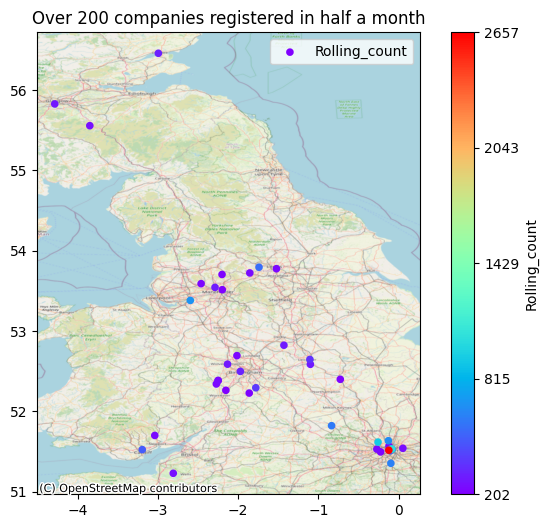

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
filter_200_15_registration = filter_200_15_registration.sort_values(by='Rolling_count', ascending=True)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Over 200 companies registered in half a month')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(filter_200_15_registration['long'], filter_200_15_registration['lat'], s=12, c=filter_200_15_registration['Rolling_count'], cmap='rainbow', alpha=1, linewidths=2,label='Rolling_count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Rolling_count')

# 计算最小值和最大值
min_count = filter_200_15_registration['Rolling_count'].min()
max_count = filter_200_15_registration['Rolling_count'].max()

# 设置colorbar的刻度
num_ticks = 5  
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
#ax.set_ylim([50, 56.5])
# 添加图例
ax.legend()

# 显示地图
plt.show()

   RegAddress.PostCode        lat      long  Rolling_count
0              B49 6EH  52.226212 -1.862346          138.0
1              B66 1AA  52.496420 -1.972648          177.0
2              B95 5BY  52.292531 -1.780511          218.0
3              BD3 9HB  53.794179 -1.740533          280.0
4              BL1 4RF  53.579090 -2.449118          118.0
..                 ...        ...       ...            ...
69             WR9 8AN  52.261057 -2.153363          154.0
70            WS11 7XT  52.692318 -2.015389          128.0
71             WV1 4NB  52.586110 -2.132403          153.0
72             WV2 4LQ  52.582281 -2.131093          143.0
73             WV7 3AU  52.617495 -2.244237          118.0

[74 rows x 4 columns]


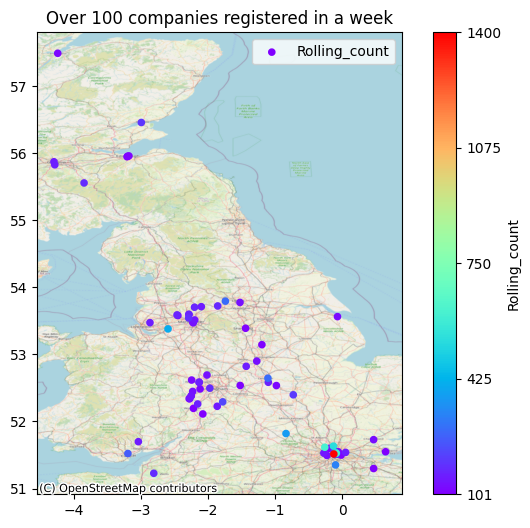

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

filter_100_7_registration = filter_by_dense_registration(df, threshold=100, duration=pd.Timedelta('7 days'))
print(filter_100_7_registration)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
filter_100_7_registration = filter_100_7_registration.sort_values(by='Rolling_count', ascending=True)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Over 100 companies registered in a week')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(filter_100_7_registration['long'], filter_100_7_registration['lat'], s=12, c=filter_100_7_registration['Rolling_count'], cmap='rainbow', alpha=1, linewidths=2,label='Rolling_count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Rolling_count')

# 计算最小值和最大值
min_count = filter_100_7_registration['Rolling_count'].min()
max_count = filter_100_7_registration['Rolling_count'].max()

# 设置colorbar的刻度
num_ticks = 5  
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
#ax.set_ylim([50, 56.5])
# 添加图例
ax.legend()

# 显示地图
plt.show()

  RegAddress.PostCode        lat      long  Rolling_count
0             BD3 9HB  53.794179 -1.740533          244.0
1             CR2 6EQ  51.352071 -0.098320          202.0
2            EC1V 2NX  51.527304 -0.088894          317.0
3            HP19 8FJ  51.820102 -0.836682          215.0
4              N1 7GU  51.530785 -0.093391          253.0
5             N14 5BP  51.632814 -0.129706          401.0
6             NW7 3SA  51.615625 -0.258170          384.0
7            WC2H 9JQ  51.514897 -0.123615          672.0


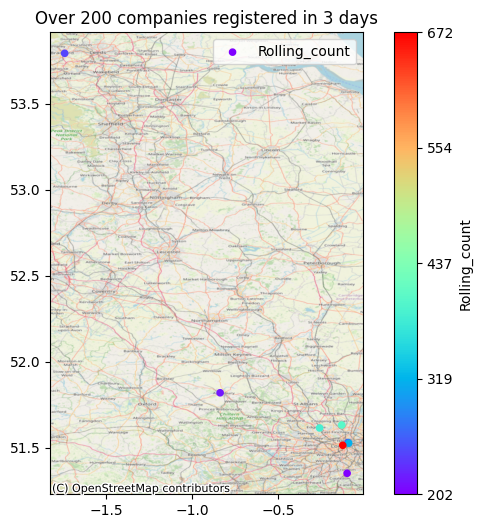

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

filter_100_1_registration = filter_by_dense_registration(df, threshold=200, duration=pd.Timedelta('3 days'))
print(filter_100_1_registration)

# 根据 'CompanyCount' 对数据进行排序，确保数量较大的点后绘制
filter_100_1_registration = filter_100_1_registration.sort_values(by='Rolling_count', ascending=True)

# 创建地图
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Over 200 companies registered in 3 days')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(filter_100_1_registration['long'], filter_100_1_registration['lat'], s=12, c=filter_100_1_registration['Rolling_count'], cmap='rainbow', alpha=1, linewidths=2,label='Rolling_count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Rolling_count')

# 计算最小值和最大值
min_count = filter_100_1_registration['Rolling_count'].min()
max_count = filter_100_1_registration['Rolling_count'].max()

# 设置colorbar的刻度
num_ticks = 5  
ticks = np.linspace(min_count, max_count, num_ticks)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(int(tick)) for tick in ticks])

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
#ax.set_ylim([50, 56.5])
# 添加图例
ax.legend()

# 显示地图
plt.show()

In [13]:
import geopandas as gpd
import pandas as pd

# 假设您已经有一个名为data的pandas DataFrame，其中包含CompanyName、lat和long等列

# 转换经纬度为点几何对象
geometry = gpd.points_from_xy(df['long'], df['lat'])

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# 查看GeoDataFrame的前几行
print(gdf.head())

                    CompanyName RegAddress.PostCode        lat      long   
0            ! HEAL UR TECH LTD             GU1 4RY  51.236867 -0.577964  \
1                         ! LTD            LS10 2RU  53.775141 -1.523001   
2                        !? LTD             SK6 3DY  53.410837 -2.100407   
3  !BIG IMPACT GRAPHICS LIMITED            EC1V 9LT  51.527080 -0.079703   
4                  !GOBERUB LTD            CM23 3FR  51.863594  0.164960   

                                     CompanyCategory IncorporationDate   
0  PRI/LTD BY GUAR/NSC (Private, limited by guara...        2022-10-12  \
1                            Private Limited Company        2012-09-11   
2                            Private Limited Company        2018-06-05   
3                            Private Limited Company        2018-12-28   
4                            Private Limited Company        2021-05-17   

                                   SICCode.SicText_1   
0             33140 - Repair of electrical

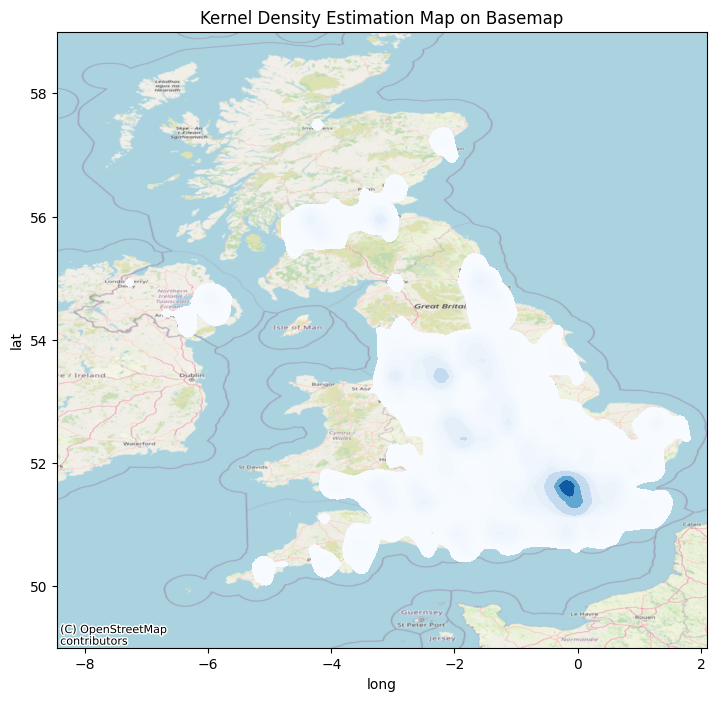

In [53]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import numpy as np

# 假设您已经将数据加载到名为 df 的 pandas DataFrame 中
# 假设您的 DataFrame 包含要绘制的数据列，例如 'long' 和 'lat'

# 创建 Geopandas 的 GeoDataFrame
gdf = gpd.GeoDataFrame(df,
                        geometry=gpd.points_from_xy(df['long'], df['lat']),
                        crs='EPSG:4326')

# 手动指定纵坐标范围
y_min = 50
y_max = 60
num_points = len(df['long'])  # 与 df['long'] 相同长度的数据点数量

# 创建与 df['long'] 相同长度的 y 值数组
y_values = np.linspace(y_min, y_max, num_points)

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 8))

#hb = ax.hexbin(df['long'], y_values, gridsize=200, cmap='YlGnBu', alpha=0.7)
sns.kdeplot(x=df['long'], y=df['lat'], cmap='Blues', fill=True, ax=ax)

# 使用 contextily 添加底层地图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_ylim([49, 59])
# 添加标题和标签
ax.set_title('Kernel Density Estimation Map on Basemap')

# 显示地图
plt.show()
